# Introduction to Statistical Mechanics

In this notebook we will explore a very system that is very similar to the one studied in lecture. It will also be a material (say, a table) consisting of $N$ independent and stationary particles. As before, we will enumerate them with a label $i=1,\dots, N$. These will be however classical "spin-1" particles, instead of the spin-1/2 particles we studied. What this means is that the spin of the $i$-th particle can now take three values $s_i=-1,0,1$. Furthermore, the energy of a distribution of spins $s={s_i}$ is
$$E(s)=D\sum_{i=1}^N s_i^2,$$
for some constant $D>0$ with units of energy.

## Developing some intuition

Let us begin with some exercises intended to make sure that we understand the system and the energy formula above. Little to no computations are required for these.

1. What is the lowest energy this system can achieve? What is the distribution of spins for which this is the energy (i.e. the ground state)?

The lowest energy the system can achieve is $E(s) = 0$ (since each summand is nonnegative, and thus the entire sum is itself nonnegative). 

This energy is obtained by the spin distribution $s_i = 0 \quad \forall i \in \{1, \ldots, N\}$ (uniquely).

2. What is the first excited energy of this system? Which distributions of spins have this energy?

The first excited energy of the system is $E(s) = D$. There are $2N$ spin configurations which have this energy, each one taking the form of 

$$s_i = \pm \delta_{i j} \quad \text{for some }\, j \in \{1, \ldots, N\},\; \forall i \in \{1, \ldots, N\}$$

4. How many states (i.e. distributions of spins) does this system have?

This system has $3^N$ distinct configurations: each spin can take a value in $A = \{-1, 0, 1\}$, and $|A| = 3$. 

5. What are all the possible energies of this system? How many states have each energy (remember the "n choose k" function)?

The energies of the system are quantized in units of $D$, (i.e., $E(s) = kD \quad \text{for some } k \in \{0, 1, \ldots, N\}$).

For a given energy, $E(s) = kD$, the state needs to have $a$ elements with spin $1$ and $b$ elements with spin $-1$ such that $a+b=k \Rightarrow b = k-a$ and $a$ can run from $0$ to $k$. Thus, we need to sum over $a \leq k$ and choose $a$ out of the $N$ elements to have spin up, and $k-a$ elements out of the remaining $N-a$ to have spin down.

Thus, we have:

$$
\Omega(E = kD) = \sum_{m = 0}^k {N\choose m}{N-m\choose k-m}
$$

## Numerical exploration

Let us now explore this system numerically.

6. Create a $3^N\times N$ NumPy array which contains all possible states of this system. You can take $N=10$. Hint: take a look at the itertools package. Play with ChatGPT to see other algorithms to do this.

In [209]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import binom
from itertools import product

N = 10

def init_ising_mat(N: int):
    possible_spins = [-1, 0, 1]
    system_configs = list(product(possible_spins, repeat=N))
    matrix_system_configs = np.zeros((3**N, N), dtype=int)
    for i in range(3**N):
        matrix_system_configs[i] = system_configs[i]
    return matrix_system_configs

ising_mat = init_ising_mat(N)
print(ising_mat)


[[-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1  0]
 [-1 -1 -1 ... -1 -1  1]
 ...
 [ 1  1  1 ...  1  1 -1]
 [ 1  1  1 ...  1  1  0]
 [ 1  1  1 ...  1  1  1]]


7. Create a function that computes the energy of a state in units of $D$

In [210]:
def compute_energy(ising_mat: np.ndarray):
    energy = np.sum(ising_mat**2, axis=-1)
    return energy

compute_energy(ising_mat)

array([10,  9, 10, ..., 10,  9, 10])

8. Use the function you created to compute the free energy per unit temperature per unit particle $\beta F/N$ for 100 temperatures evenly spaced from 0.01 to 10 (in units of $D$). Recall that this is defined as
$$e^{-\beta F}=Z=\sum_{s}e^{-\beta E(s)},$$
where the sum is taken over all states $s$ of the system (which should already be in an array you created). Plot your result. Does it depend on $N$?

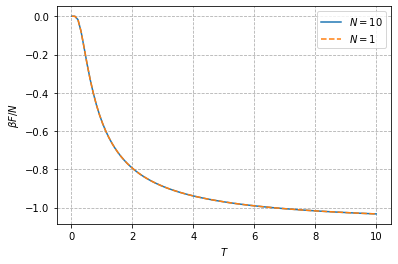

In [211]:
def compute_free_energy_per_temp(ising_mat: np.ndarray, betas: np.ndarray):
    energy = compute_energy(ising_mat)
    free_energy_per_temp = -np.log(np.sum(np.exp(-np.multiply.outer(betas, energy)), axis=-1))
    return free_energy_per_temp

Ts = np.linspace(0.01, 10, 100)
betas = 1/Ts
free_ener_per_temp = compute_free_energy_per_temp(ising_mat, betas)/N

N2 = 1
ising_mat_2 = init_ising_mat(N2)
free_ener_per_temp_2 = compute_free_energy_per_temp(ising_mat_2, betas)/N2

# Plotting
plt.plot(Ts, free_ener_per_temp, label=rf'$N=${N}')
plt.plot(Ts, free_ener_per_temp_2, label=rf'$N=${N2}', ls='--')
plt.xlabel(r'$T$')
plt.ylabel(r'$\beta F/N$')
plt.grid(ls='--')
plt.legend()
plt.show()


Given that the result is practically identical for different $N$'s, it appears that $\beta F/N$ is independent of the number lattice elements $N$.

9. In a similar way, compute the average magnetization $m$ per unit particle for the temperatures considered above. Recall that this is given by $m=M/N$ where
$$M=\frac{1}{Z}\sum_s e^{-\beta E(s)}\mathcal{M}(s),$$
and
$$\mathcal{M}(s) = \sum_{i=1}^N s_i.$$
Do a plot of it and explain your result physically.

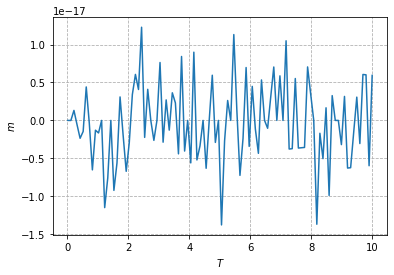

In [212]:
def compute_magnetization(ising_mat: np.ndarray, betas: np.ndarray):
    energy = compute_energy(ising_mat)
    config_magnetizations = np.sum(ising_mat, axis=-1)
    Z = np.sum(np.exp(-np.multiply.outer(betas, energy)), axis=-1)
    M= np.sum(config_magnetizations*np.exp(-np.multiply.outer(betas, energy)), axis=-1)/Z
    return M

magnetization = compute_magnetization(ising_mat, betas)
plt.plot(Ts, magnetization/N)
plt.xlabel(r'$T$')
plt.ylabel(r'$m$')
plt.grid(ls='--')
plt.show()

The magnetization is essentially $0$ (since we obtain values of $10^{-17}$ which are negligibly small compared to all other parameters in the system). This is expected, since there is no preference for the system to take either spin $\pm 1$ because they are energetically equivalent, and thus the contributions to magnetization. If there were a magnetic field or something 'motivating' the spins to align on a particular direction, then magnetization would be nonzero (generally).

10. Compute the average energy of this system asa function of temperature using
$$\langle E\rangle=\frac{1}{Z}\sum_s e^{-\beta E(s)}E(s).$$
Plot the energy per particle and explain your results physically.

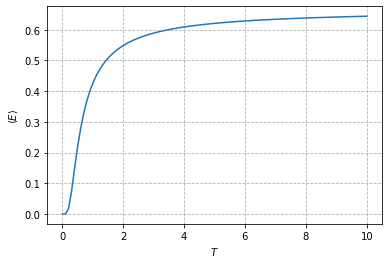

In [213]:
def compute_avg_energy(ising_mat: np.ndarray, betas: np.ndarray):
    energy = compute_energy(ising_mat)
    Z = np.sum(np.exp(-np.multiply.outer(betas, energy)), axis=-1)
    E = np.sum(energy*np.exp(-np.multiply.outer(betas, energy)), axis=-1)/Z
    return E

avg_energy = compute_avg_energy(ising_mat, betas)
plt.plot(Ts, avg_energy/N)
plt.xlabel(r'$T$')
plt.ylabel(r'$\langle E \rangle$')
plt.grid(ls='--')
plt.show()

The energy of the system appears to be $0$ at absolute zero, then increases (quite fast, exponential-esque) but then asymptotes to a finite constant (apparently) as $T\to\infty$. This would mean that an increase in temperature does lead to an increase in the average energy, so we can (statistically) relate a higher temperature with more 'excited' configurations. 

11. Compute the average energy of this system implementing numerically the following derivative
$$\langle E\rangle =\frac{\partial\beta F}{\partial \beta}.$$
Plot your results and verify whether they agree with the brute force method used above.

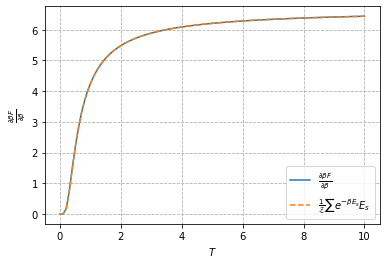

In [214]:
epsi = 1e-5
avg_energy_deriv = (
    compute_free_energy_per_temp(ising_mat, betas+epsi) 
    - compute_free_energy_per_temp(ising_mat, betas)
    )/epsi

plt.plot(Ts, avg_energy_deriv, label=r"$\frac{\partial \beta F}{\partial \beta}$")
plt.plot(Ts, avg_energy, label=r'$ \frac{1}{\mathcal{Z}}\sum e^{-\beta E_s} E_s$', ls='--')
plt.xlabel(r'$T$')
plt.ylabel(r'$\frac{\partial \beta F}{\partial \beta}$')
plt.legend()
plt.grid(ls='--')
plt.show()


## Analytical Exploration

Now we will explore this model analytically.

12. Compute the partition function of this model explicitely for the cases $N=1$, $N=2$ and $N=3$. Do you see a factorization similar to that of the model studied in lecture? What is the result for general $N$?

For $N=1$:
$$\mathcal{Z}_1 = e^{-D\beta (1)^2}+e^{-D\beta (-1)^2}+e^{-D\beta (0)^2} = 2e^{-\beta D}+1$$

For $N=2$:
\begin{align*}
    \mathcal{Z}_2 &= e^{-D\beta[(1)^2+(1)^2]}+e^{-D\beta[(1)^2+(-1)^2]}+e^{-D\beta[(-1)^2+(1)^2]}+e^{-D\beta[(-1)^2+(-1)^2]}+\\&+e^{-D\beta[(1)^2+(0)^2]}+e^{-D\beta[(-1)^2+(0)^2]}+e^{-D\beta[(0)^2+(1)^2]}+e^{-D\beta[(0)^2+(-1)^2]}+\\&+e^{-D\beta[(0)^2+(0)^2]}
    \\&=4e^{-D \beta \cdot 2}+ 1e^{-D\beta \cdot 0}+4e^{-D \beta \cdot 1} = (2e^{-D \beta \cdot}+1)^2 \\&= (\mathcal{Z}_1)^2
\end{align*}

For $N=3$:
\begin{align*}
    \mathcal{Z}_3 &= \Omega(3D)e^{-3D\beta}+\Omega(2D)e^{-2D\beta}+\Omega(D)e^{-D\beta}+\Omega(0)\\
    & = 8e^{-3D\beta}+12e^{-2D\beta}+ 6e^{-D\beta}+ 1\\
    & = (2e^{-D\beta}+1)^3 = (\mathcal{Z}_1)^3
\end{align*}

We infer that $\mathcal{Z}_N = (\mathcal{Z}_1)^N$

13. What is the free energy? Plot it as a function of the temperature and verify whether the analytical result agrees with the numerical study above.

The free energy per unit temperature is therefore $\beta F = -\log(\mathcal{Z}_N)= -N \log(2e^{-D\beta}+1)$ which is indeed linearly dependent on $N$ as we expected from the numerical results. 


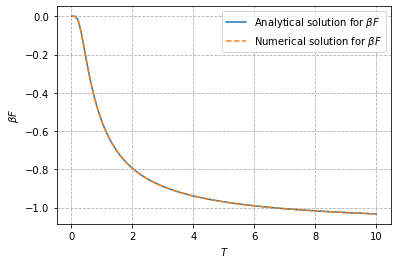

In [215]:
f_analytical = np.log(2*np.exp(-betas)+1)
plt.plot(Ts, -f_analytical, label=r'Analytical solution for $\beta F$')
plt.plot(Ts, free_ener_per_temp, label=r'Numerical solution for $\beta F$', ls='--')
plt.xlabel(r'$T$')
plt.ylabel(r'$\beta F$')
plt.legend()
plt.grid(ls='--')
plt.show()

14. What is the magnetization? Does your analytical result agree with the numerical computations?

First, we notice that the energy $E(s)$ is invariant under the $\mathbf{Z}_2$ transformation $s_i \mapsto -s_i$ since only terms with $s_i^2$ appear on its expression. Nonetheless, we have $\mathcal{M}(s) \mapsto -M(s)$ since $\mathcal{M}(s)$ is linear in every $s_i$. 

Now, notice that the possible configurations of the spins can be divided into three sets: 

\begin{align*}
    \mathcal{S}_1 &\coloneqq \{ (s_1, \ldots, s_N )\;\vert\; \mathcal{M}(s) = 0\}\\
    \mathcal{S}_2 &\coloneqq \{ (s_1, \ldots, s_N )\;\vert \;\mathcal{M}(s) > 0\}\\
    \mathcal{S}_3 &\coloneqq \{-s \;\rvert\; s \in \mathcal{S}_2\}
\end{align*}

Here, $\mathcal{M}(\mathcal{S}_1)$ does not provide any contribution to $M$, and every contribution $\mathcal{M}(s) \forall s \in \mathcal{S}_2$ gets cancelled by an opposing contribution $\mathcal{M}(-s) = -\mathcal{M}(s)$, where $-s \in \mathcal{S}_3$. Thus, $M=0$. 

This result does indeed agree with the numerical computations, which were basically negligible.


15. What is the energy of this system as a function of temperature? What is it in the limit as $T\rightarrow 0$? What is it in the limit as $T\rightarrow \infty$? Explain these limits physically. Plot the energy per particle.

\begin{align*}
    \langle E\rangle &=\frac{\partial\beta F}{\partial \beta} = -\frac{\partial \log\mathcal{Z}}{\partial \beta} = -N \frac{\partial}{\partial \beta}\log(2e^{-D\beta}+1)\\
    &=ND\frac{2e^{-D\beta}}{2e^{-D\beta}+1} = ND\frac{1}{1+\frac{1}{2}e^{D \beta}}
\end{align*}

We can see that as $T\to 0$ (positively), $\beta \to +\infty$, and thus $\langle E\rangle= ND\dfrac{1}{1+\frac{1}{2}e^{D \beta}} \xrightarrow{\beta \to \infty}0$.

Meanwhile, $T\to \infty \Rightarrow \beta \to 0$, and thus $\langle E \rangle = ND\dfrac{1}{1+\frac{1}{2}e^{D \beta}} \xrightarrow{\beta \to 0} \frac{ND}{1+\frac{1}{2}} = \frac{2}{3}ND$.

We can clearly what this limits mean physically: as $T\to 0$, the electrons will not be excited and none of them will provide a non-zero contribution to the energy (on average). Indeed, the probability for all configurations to happen gets suppressed exponentially by $ e^{-\beta E(s)}\xrightarrow{\beta \to \infty}0$ except for the groundstate as the exponential becomes $1$. On the other hand, as $T\to \infty$, 2/3 of the electrons in the system will become excited (not necessarily on the same direction) and thus the total energy equals $ND$ (since each electron provides $D$ units of energy because of its definition) times $\frac{2}{3}$. This is possible due to the fact that the limit of $T\to\infty$ corresponded to maximally disordered systems, and thus every spin is equally likely to be taken by each electron; since spins $\pm 1$ contribude $D$ units of energy, but spin $0$ contributes $0$ energy, we see that the average energy should be $\frac{2}{3}ND$

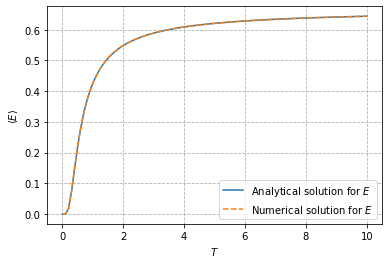

In [216]:
energy_analytical = 2*np.exp(-betas)/(2*np.exp(-betas)+1)
plt.plot(Ts, energy_analytical, label=r'Analytical solution for $E$')
plt.plot(Ts, avg_energy/N, label=r'Numerical solution for $E$', ls='--')
plt.grid(ls='--')
plt.xlabel(r'$T$')
plt.ylabel(r'$\langle E \rangle$')
plt.legend()

16. What is the entropy of this system as a function of temperature? What are the low and high temperature limits? Explain these physically and plot the entropy per particle.

$$F = \langle E \rangle - TS \Rightarrow S = \beta (\langle E \rangle - F) 
= N\left[\frac{D\beta }{1+\frac{1}{2}e^{D\beta}}+\log(2e^{-D\beta}+1)\right] $$

We can see that the low temperature limit $\beta \to \infty$ results in $$\lim_{\beta \to \infty}F(\beta) = 0+\log(1) = 0$$
which can be associated to the fact that, at absolute zero, the system can only be on the groundstate, and thus there is no disorder associated with these states. 

Meanwhile, the high temperature limit $\beta \to 0$ results in $$\lim_{\beta \to 0}F(\beta) = 0+\log(3) = \log(3)$$. Entropy as a function of temperature is monotonic, which justifies the previously made assertion that we can associate disorder to temperature. We can see that this limit is also represented by a single particle with exactly the same probability to be in any state of the system (i.e., $p_0 = p_1 = p_{-1}=\frac{1}{3}$):
$$S = p_0 \log(1/p_0)+p_1 \log(1/p_1)+p_{-1} \log(1/p_{-1}) = 3 \cdot \left(\frac{1}{3}\log(3)\right)= \log(3)$$
which allows us to think about this entropy more intuitively.

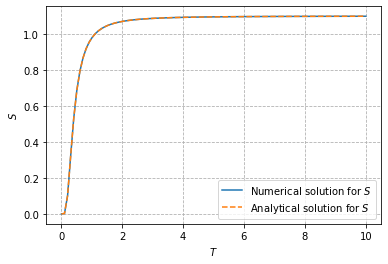

In [217]:
plt.plot(Ts, (avg_energy/N/Ts - free_ener_per_temp), label=r'Numerical solution for $S$')
plt.plot(Ts, betas/(1+np.exp(betas)/2)+np.log(2*np.exp(-betas)+1), label=r'Analytical solution for $S$', ls='--')
plt.grid(ls='--')
plt.xlabel(r'$T$')
plt.ylabel(r'$S$')
plt.legend()
plt.show()

17. Challenge Problem: For which temperatures is the energy $E>\frac{2}{3}ND$?

Note that $\langle E \rangle (T)$ is a monotonous function of $T$. Thus, we only need to find $T^\star$ such that $ \langle E \rangle (T^\star) = \frac{2}{3}ND$, but it approaches this value asymptotically as $T \to \infty$, so there are no physical values for which this energy is achievable. In fact, since the function $\langle E \rangle:\mathbf{R}^+_0 \to \text{Im}(\langle E \rangle)$ is bijective, we can attempt to find $T^\star$ by computing the inverse of the function.

We have:
\begin{align*}
    \langle E \rangle (T) &= ND\dfrac{1}{1+\frac{1}{2}e^{D \beta}} \Rightarrow \frac{1}{2}e^{DB} = \frac{ND}{\langle E \rangle}-1\\
    & \Rightarrow T= D \log^{-1}\left(\frac{2ND}{\langle E \rangle}-2\right)
\end{align*}

And letting $E^\star = \frac{2}{3}ND$, we have $T^\star = D \log^{-1}(3-2) = \dfrac{D}{\log(0)}$

and thus we see that it can only be reached asymptotically as $\log(0)^{-1}$ is not well defined. 

However, we can see that for $T<0$,  $\langle E \rangle > \frac{2}{3}ND$.

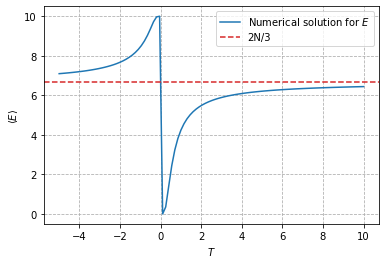

In [218]:
Ts_neg = np.linspace(-5, 10, 101)
avg_energy_neg = compute_avg_energy(ising_mat, 1/Ts_neg)
plt.plot(Ts_neg, avg_energy_neg, label=r'Numerical solution for $E$')
plt.axhline(2*N/3, ls='--', color='C3', label=r'2N/3')
plt.grid(ls='--')
plt.legend()
plt.xlabel(r'$T$')
plt.ylabel(r'$\langle E \rangle$')
plt.show()

18. Describe your progress throughout the week. What have you learned? Which parts were challenging? What would you like to delve into further in the future?

I had some experience with this type of analysis, but it is always nice to practice (especially with systems that I had not dealt with before). I also liked to have the opportunity to compare numerical and analytical results side by side, especially because I had never worked numerically before. It was not extremely challenging, but it also made me realize that I am not 100% comfortable with some aspects in this type of problems. I would definitely like to delve into more advanced physics on the upcoming weeks, and use more advanced numerical and mathematical methods. 